# Introduction

## Import required packages

In [75]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import os
%matplotlib inline


## Set working directory 

In [27]:
os.getcwd()
os.chdir(r"D:\mariem\Academics\master\cours\TC1\project")
path = os.getcwd()

## Load the data

In [11]:
from IPython.display import display, HTML

def read_data(csvfile):
    df = pd.read_csv(csvfile)
    return df

file = os.path.join(path, "train.csv")
df = read_data(file)
display(df.head())
display(df.tail())

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9
61877,61878,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,Class_9


# Exploratory Data Analysis

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


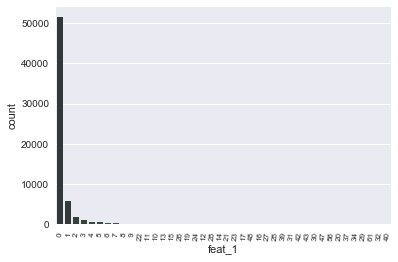

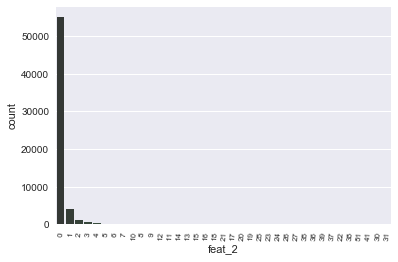

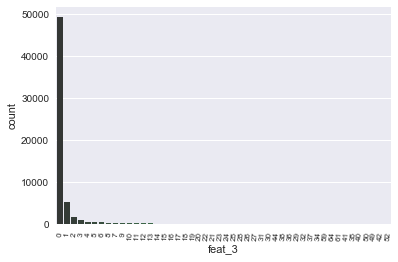

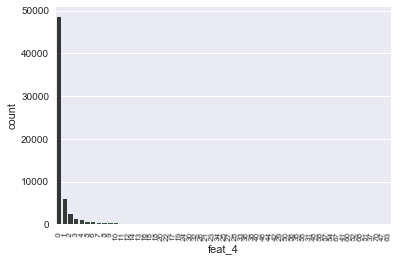

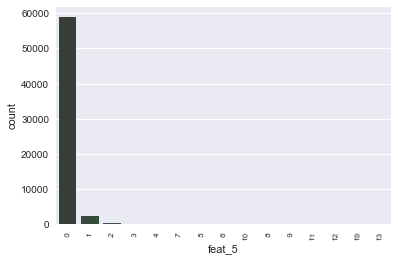

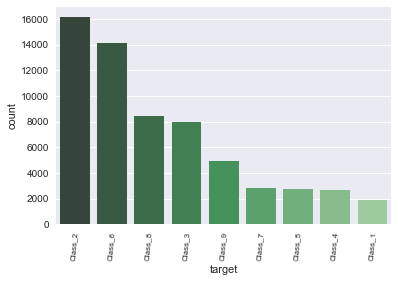

In [29]:
#summary statistics of our data
summary = df.describe()
display(summary)
#count the number of unique levels for each feature as well as for Target 
nb_levels = pd.DataFrame()
cols = df.columns
for j in range(df.shape[1]):
    l = df[cols[j]].unique()
    nb_levels[cols[j]] = pd.Series(len(l))
#distribution of levels for some features
for feat in list(cols[1:6])+[cols[-1]]:
    figName = feat+'.png'
    plt.figure()
    sns.countplot(x=feat, data= df, order = df[feat].value_counts().index, palette="Greens_d")
    plt.xticks(rotation=85, fontsize = 8)
    plt.show()

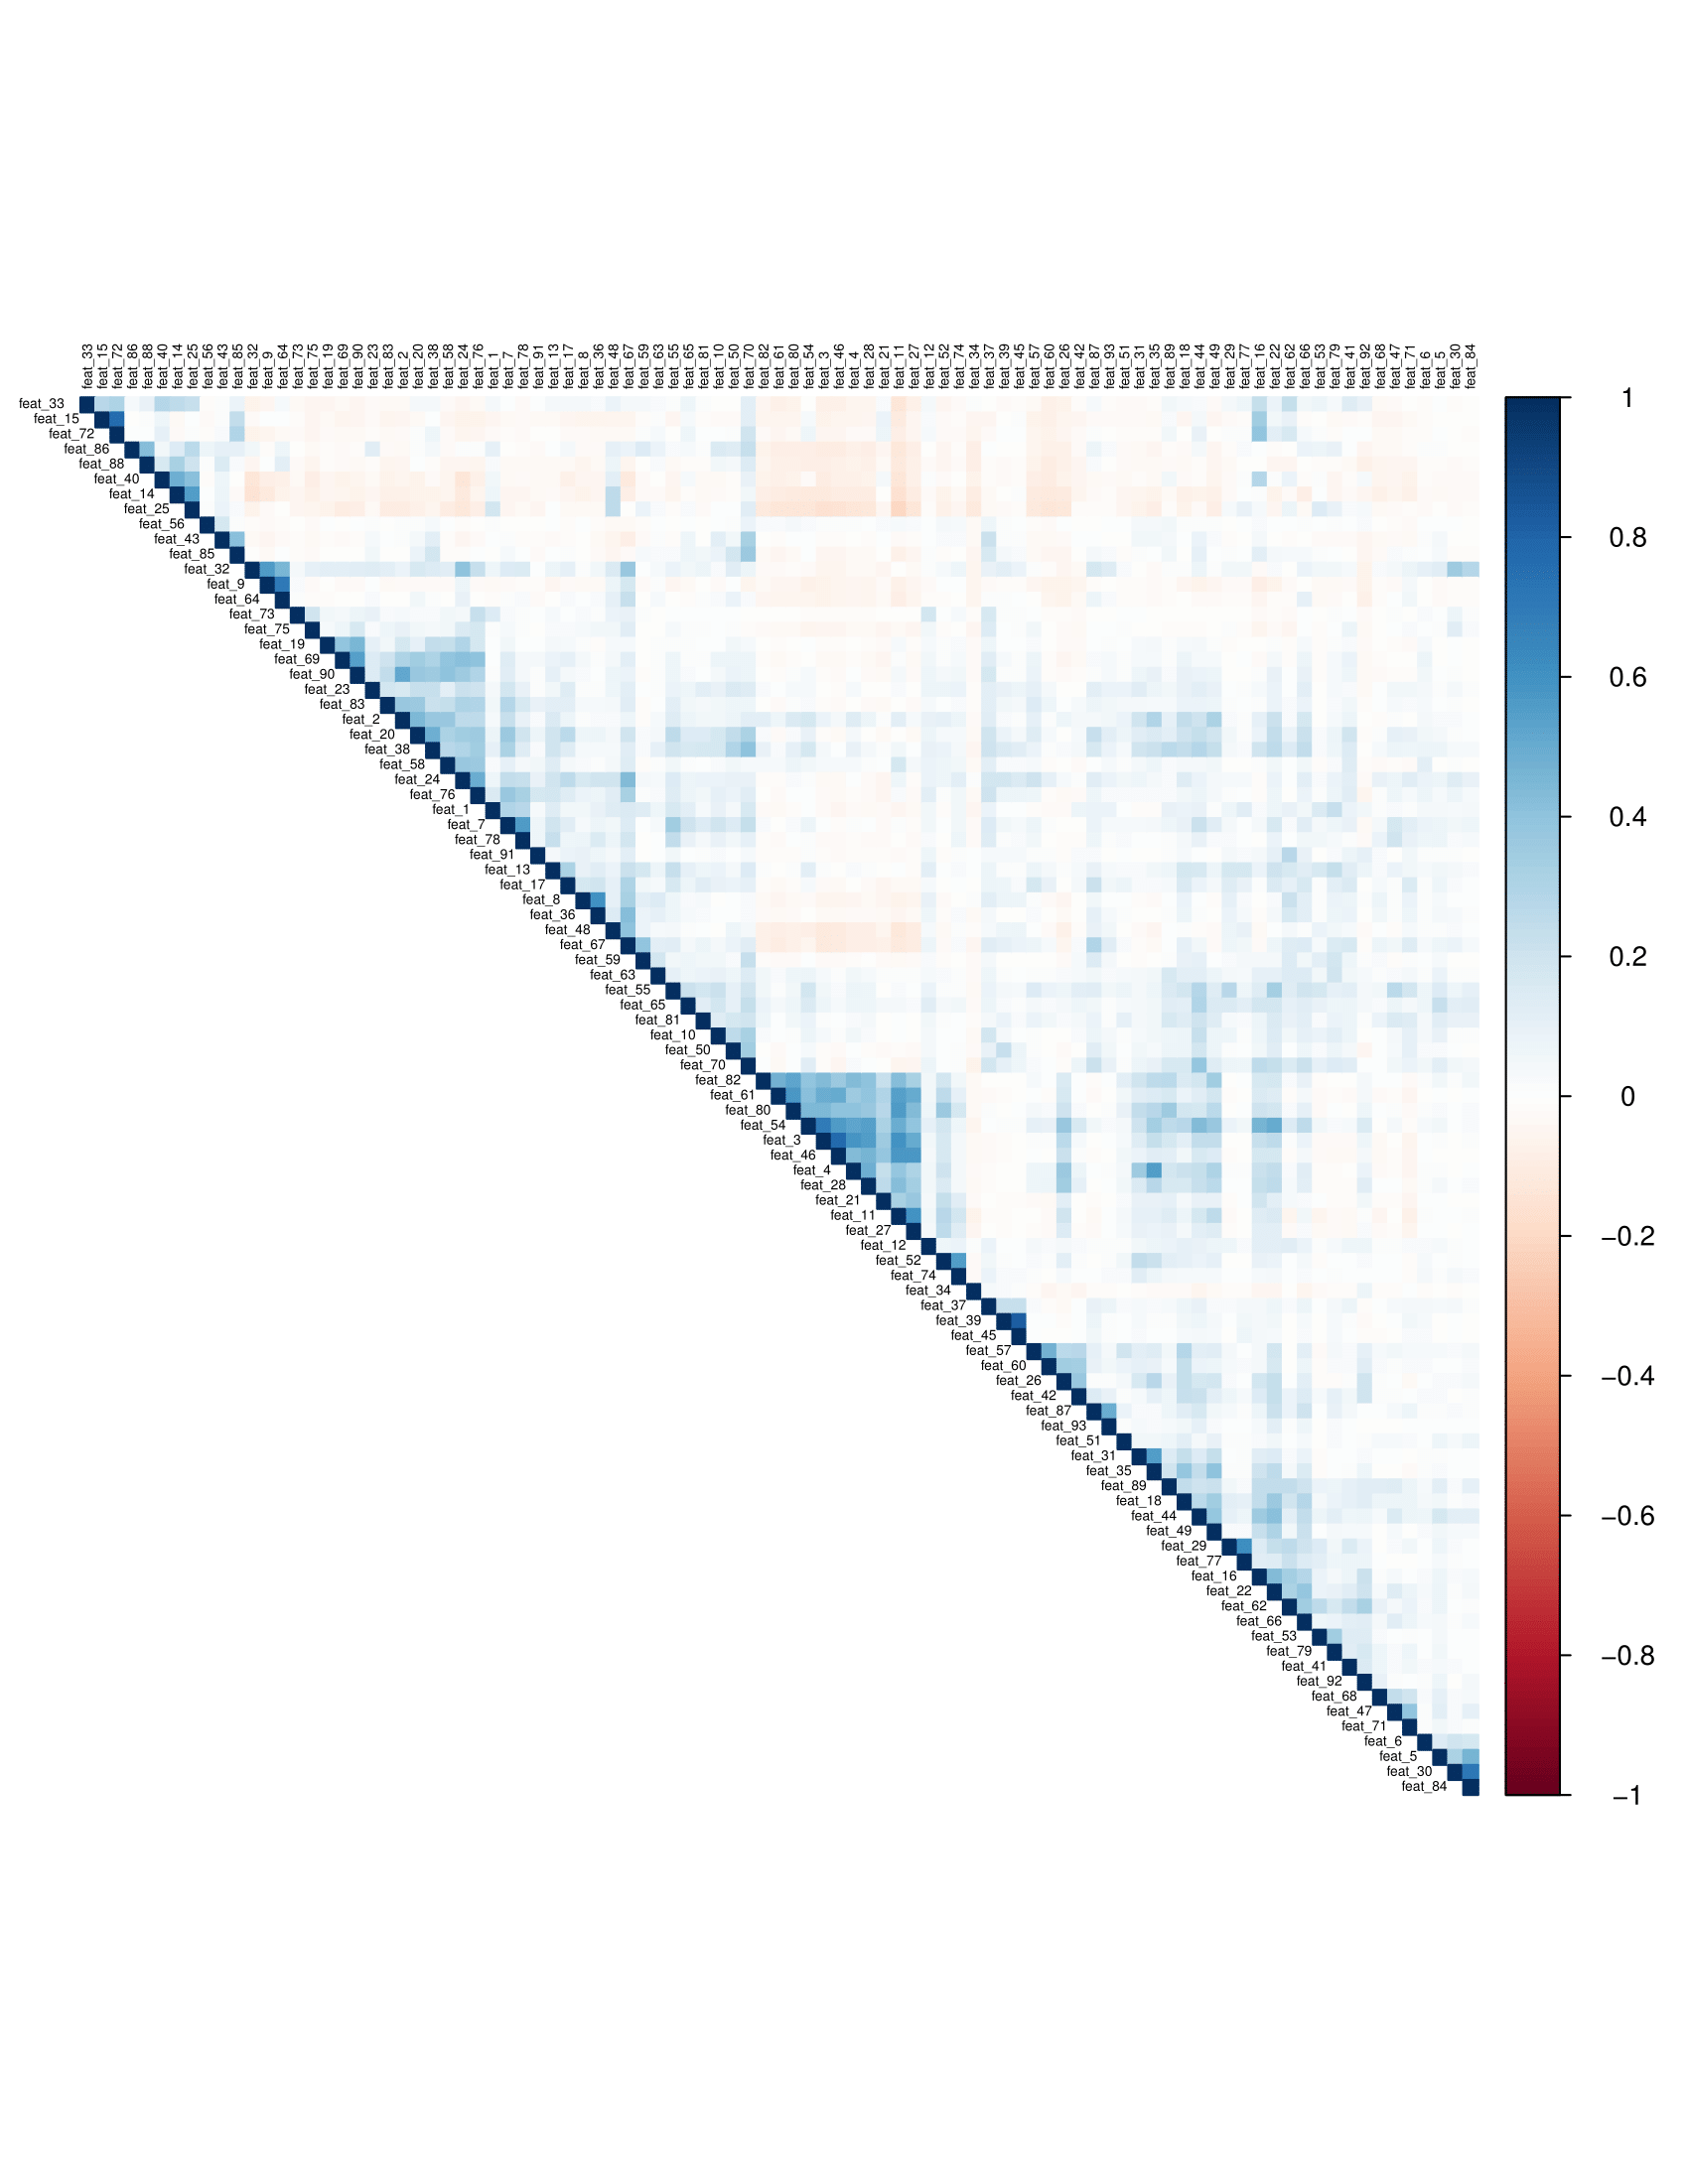

In [33]:
# feature correlation
corr = train_df[cols[1:-1]].corr()

from IPython.display import Image
Image(os.path.join(path,"EDA","corr_Otto.png"), width=800, height=800)


In [51]:
#seperate features and target
X = df[cols[1:-1]]
y = df[cols[-1]]
# try PCA
pca = PCA()
pca.fit(X)
exp_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.zeros(exp_var_ratio.shape)
for i in range(len(cumulative_var_ratio)):
    cumulative_var_ratio[i] = np.sum(exp_var_ratio[0:i+1])
exp_var_ratio = np.concatenate((exp_var_ratio.reshape(1,len(exp_var_ratio)), cumulative_var_ratio.reshape(1,len(cumulative_var_ratio))), axis=0)
pd.set_option('display.max_columns', 100)
display(pd.DataFrame(exp_var_ratio, columns = cols[1:-1], index = ['Proportion of variance', 'Cumulative proportion']))

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47,feat_48,feat_49,feat_50,feat_51,feat_52,feat_53,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
Proportion of variance,0.117721,0.086145,0.063882,0.061287,0.044092,0.039699,0.034891,0.031501,0.029380,0.027462,0.025933,0.022251,0.021618,0.019705,0.019225,0.018607,0.017519,0.017054,0.015499,0.014139,0.012444,0.011826,0.010702,0.010164,0.010007,0.009283,0.008600,0.008264,0.008124,0.007505,0.007442,0.007032,0.006940,0.006742,0.006582,0.00626,0.006071,0.005961,0.005687,0.005479,0.005241,0.004963,0.004814,0.004699,0.004491,0.004046,0.003936,0.003868,0.003655,0.003421,0.003364,0.003146,0.003077,0.002986,0.002765,0.002737,0.002634,0.002506,0.002447,0.002362,0.002338,0.002264,0.002207,0.002073,0.002023,0.001853,0.001804,0.001726,0.001698,0.001593,0.001538,0.001440,0.001431,0.001344,0.001301,0.001241,0.001214,0.001080,0.001026,0.000969,0.000932,0.000876,0.000852,0.000807,0.000762,0.000741,0.000680,0.000661,0.000535,0.000447,0.000335,0.000246,0.000081
Cumulative proportion,0.117721,0.203866,0.267748,0.329035,0.373128,0.412827,0.447718,0.479219,0.508599,0.536061,0.561993,0.584244,0.605863,0.625568,0.644794,0.663401,0.680919,0.697973,0.713473,0.727612,0.740056,0.751881,0.762583,0.772747,0.782754,0.792038,0.800638,0.808902,0.817026,0.824531,0.831973,0.839005,0.845945,0.852687,0.859269,0.86553,0.871600,0.877561,0.883248,0.888726,0.893968,0.898931,0.903745,0.908444,0.912935,0.916981,0.920917,0.924785,0.928440,0.931861,0.935226,0.938371,0.941448,0.944435,0.947199,0.949936,0.952571,0.955076,0.957523,0.959885,0.962223,0.964487,0.966694,0.968767,0.970789,0.972643,0.974447,0.976173,0.977870,0.979463,0.981001,0.982441,0.983872,0.985215,0.986516,0.987757,0.988970,0.990051,0.991077,0.992046,0.992978,0.993854,0.994706,0.995512,0.996274,0.997015,0.997695,0.998356,0.998892,0.999338,0.999674,0.999919,1.000000


We note that **80% of the variance** can be explained by the first **27 features**. Thus, a dimensionality reduction is possible!

In [49]:
clf = ExtraTreesClassifier(max_features=None)
clf = clf.fit(X, y)
model1 = SelectFromModel(clf, prefit=True)
idx1 = model1.get_support(indices=True)
X_new = model1.transform(X)
X_new.shape   
feat_selected1 = list(X.columns[idx1])
print("%d features selected"%len(feat_selected1))
print('---------------------')
print(feat_selected1)

28 features selected
---------------------
['feat_3', 'feat_8', 'feat_9', 'feat_11', 'feat_14', 'feat_15', 'feat_24', 'feat_25', 'feat_26', 'feat_34', 'feat_36', 'feat_39', 'feat_40', 'feat_42', 'feat_43', 'feat_48', 'feat_60', 'feat_62', 'feat_64', 'feat_67', 'feat_68', 'feat_69', 'feat_72', 'feat_75', 'feat_76', 'feat_86', 'feat_88', 'feat_90']


In [50]:
model2 = SelectKBest(mutual_info_classif, k=30).fit(X,y)
idx2 = model2.get_support(indices=True)
X_new = model2.transform(X) 
X_new.shape
feat_selected2 = list(X.columns[idx2])
print("%d features selected"%len(feat_selected2))
print('---------------------')
print(feat_selected2)

30 features selected
---------------------
['feat_3', 'feat_4', 'feat_8', 'feat_11', 'feat_14', 'feat_15', 'feat_24', 'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_32', 'feat_34', 'feat_35', 'feat_36', 'feat_40', 'feat_42', 'feat_46', 'feat_54', 'feat_57', 'feat_58', 'feat_60', 'feat_61', 'feat_67', 'feat_69', 'feat_76', 'feat_80', 'feat_86', 'feat_88', 'feat_90']


In [52]:
common_feat_selected = [f for f in feat_selected1 if f in feat_selected2]
print("%d common features selected for both methods"%len(common_feat_selected))
print("-------------------------------------------")
print(common_feat_selected)

19 common features selected for both methods
-------------------------------------------
['feat_3', 'feat_8', 'feat_11', 'feat_14', 'feat_15', 'feat_24', 'feat_25', 'feat_26', 'feat_34', 'feat_36', 'feat_40', 'feat_42', 'feat_60', 'feat_67', 'feat_69', 'feat_76', 'feat_86', 'feat_88', 'feat_90']


# Modeling

In [56]:
#spit data into train/test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size =0.2, random_state = 42)

In [71]:
def plot_class_dist(y, label):
    title = 'target_'+label
    total = len(y)
    f = plt.figure()
    ax = sns.countplot(y,  order=['Class_1', 'Class_2', 'Class_3', 'Class_4', 
                                  'Class_5', 'Class_6', 'Class_7', 'Class_8',
                                  'Class_9'], palette="Greens_d")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}'.format(height/total),
                ha="center") 

    plt.xticks(rotation=85, fontsize = 8)
    plt.title(title)
    plt.show()

The above function shows the class distributions for each set. We'll use it to compare them to the initial set's distribution of classes.

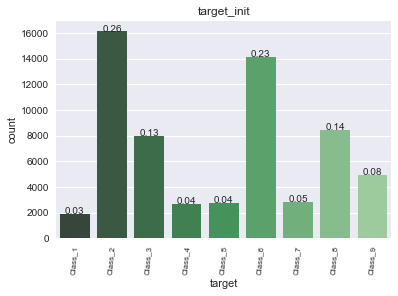

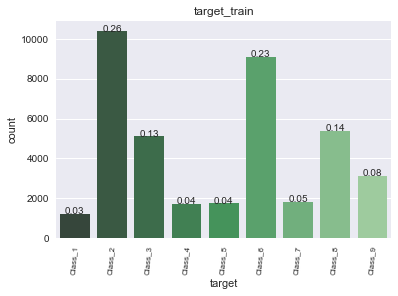

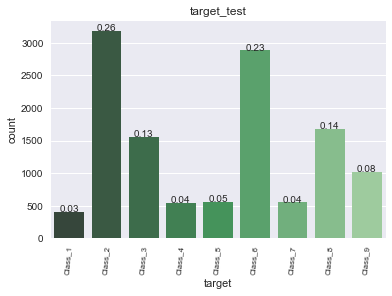

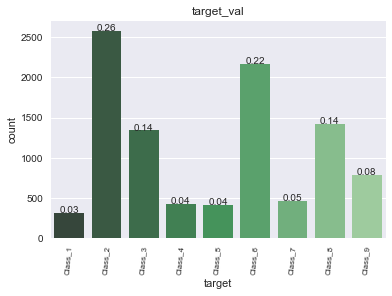

In [72]:
plot_class_dist(y, 'init')
plot_class_dist(y_train, 'train')
plot_class_dist(y_test, 'test')
plot_class_dist(y_val, 'val')

In [22]:
#from sklearn.model_selection import StratifiedShuffleSplit

#X_train = np.asarray(X_train)
#y_train = np.asarray(y_train)
#sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)
#for train_index, test_index in sss.split(X_train, y_train):
#    X_train_, X_val_ = X_train[train_index], X_train[test_index]
#    y_train_, y_val_ = y_train[train_index], y_train[test_index]

In [76]:
#try out some classification models
models = [KNeighborsClassifier(5), RandomForestClassifier(), LinearSVC(), 
              LogisticRegression(), GradientBoostingClassifier(), MLPClassifier(), 
                                GaussianNB(), QuadraticDiscriminantAnalysis() ]
names = ["KNeighborsClassifier(5)", "RandomForestClassifier()", "LinearSVC()", 
          "LogisticRegression()", "GradientBoostingClassifier()", "MLPClassifier()", 
                            "GaussianNB()", "QuadraticDiscriminantAnalysis()"]
accuracy = {}
for i, clf in enumerate(models):
    clf.fit(X_train, y_train)
    mean_acc = clf.score(X_test, y_test)
    accuracy[names[i]] = mean_acc



In [82]:
for key in accuracy.keys():
    accuracy[key] = '%.2f' %accuracy[key]

In [85]:
display(pd.DataFrame.from_dict(accuracy, orient="index"))

,0
KNeighborsClassifier(5),0.77
RandomForestClassifier(),0.77
LinearSVC(),0.75
LogisticRegression(),0.76
GradientBoostingClassifier(),0.78
MLPClassifier(),0.79
GaussianNB(),0.62
QuadraticDiscriminantAnalysis(),0.68
